### Limpieza de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os

In [2]:
os.getcwd()

'/Users/macbookair/Documents/GitHub/predicting_poverty_bdmc/scripts'

In [7]:
ruta = '/Users/macbookair/Documents/GitHub/predicting_poverty_bdmc'
print(os.getcwd())

#'/Users/macbookair/Documents/GitHub/predicting_poverty_bdmc'
#'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc'

/Users/macbookair/Documents/GitHub/predicting_poverty_bdmc/scripts


tr_p = pd.read_csv(ruta+'\\stores\\train_personas.csv')
ts_p = pd.read_csv(ruta+'\\stores\\test_personas.csv')
ts_h = pd.read_csv(ruta+'\\stores\\test_hogares.csv')
tr_h = pd.read_csv(ruta+'\\stores\\train_hogares.csv')

In [8]:
#Amrimos las bases de datos

tr_p = pd.read_csv(ruta+'/stores/train_personas.csv')
ts_p = pd.read_csv(ruta+'/stores/test_personas.csv')
tr_h = pd.read_csv(ruta+'/stores/train_hogares.csv')
ts_h = pd.read_csv(ruta+'/stores/test_hogares.csv')

In [9]:
#Crear variables para luego unir bases
tr_p['sample'] = 'train'
tr_h['sample'] = 'train'
ts_p['sample'] = 'test'
ts_h['sample'] = 'test'

In [10]:
#train personas
trp_l = tr_p.rename(columns = {
    'P6020': 'sexo',
    'P6040': 'edad',
    'P6090': 'afil_salud',
    'P6100': 'reg_salud',
    'P6210': 'nivel_edu',
    'P6210s1': 'anos_edu',
    'P6240': 'semana_oficio',
    'P6430': 'posi_lab',
    'P6510': 'h_extra',
    'P6545': 'prima',
    'P6580': 'bonos',
    'P6585s1': 'a_alim',
    'P6585s2': 'a_trans',
    'P6585s3': 'a_fam',
    'P6585s4': 'a_edu',
    'P6590': 'sal_alim',
    'P6600': 'sal_viv',
    'P6620': 'sal_especie',
    'P6630s1': 'prima_serv',
    'P6630s2': 'prima_nav',
    'P6630s3': 'prima_vac',
    'P6630s4': 'viaticos',
    'P6630s6': 'bon_anual',
    'P6800': 'h_tra_prin',
    'P6920': 'afil_pension',
    'P7045': 'h_tra_2',
    'P7495': 'arriendo',
    'P7500s2': 'pension',
    'P7500s3': 'pat_pension',
    'P7510s2': 'hog_int',
    'P7510s3': 'ayuda_gov',
    'P7510s5': 'rent_inv',
    'P7510s6': 'rent_cesantias',
    'P7510s7': 'otras_fuentes',
    'P7422': 'ing_desempleo',
    'Ingtot' : 'ingtot'
})

#test personas
tsp_l = ts_p.rename(columns = {
    'P6020': 'sexo',
    'P6040': 'edad',
    'P6090': 'afil_salud',
    'P6100': 'reg_salud',
    'P6210': 'nivel_edu',
    'P6210s1': 'anos_edu',
    'P6240': 'semana_oficio',
    'P6430': 'posi_lab',
    'P6510': 'h_extra',
    'P6545': 'prima',
    'P6580': 'bonos',
    'P6585s1': 'a_alim',
    'P6585s2': 'a_trans',
    'P6585s3': 'a_fam',
    'P6585s4': 'a_edu',
    'P6590': 'sal_alim',
    'P6600': 'sal_viv',
    'P6620': 'sal_especie',
    'P6630s1': 'prima_serv',
    'P6630s2': 'prima_nav',
    'P6630s3': 'prima_vac',
    'P6630s4': 'viaticos',
    'P6630s6': 'bon_anual',
    'P6800': 'h_tra_prin',
    'P6920': 'afil_pension',
    'P7045': 'h_tra_2',
    'P7495': 'arriendo',
    'P7500s2': 'pension',
    'P7500s3': 'pat_pension',
    'P7510s2': 'hog_int',
    'P7510s3': 'ayuda_gov',
    'P7510s5': 'rent_inv',
    'P7510s6': 'rent_cesantias',
    'P7510s7': 'otras_fuentes',
    'P7422': 'ing_desempleo',
    'Ingtot' : 'ingtot'
})

In [ ]:
categorical_var = ['semana_oficio', 'posi_lab']
continuous_var = ['h_tra_prin']

In [37]:
data_p['nivel_edu'].unique()

array([ 3.,  2.,  5.,  4.,  1.,  6., nan,  9.])

In [11]:
#Nos quedamos con algunas variables para cada base

trp_l = trp_l[['id', 'Orden', 'Clase', 'Dominio', 'sexo', 'edad', 'afil_salud', 
               'reg_salud', 'nivel_edu', 'anos_edu', 'semana_oficio', 'posi_lab', 'h_extra', 
               'prima', 'bonos', 'a_alim', 'a_trans', 'a_fam', 'a_edu', 'sal_alim',
                'sal_viv', 'sal_especie', 'prima_serv', 'prima_nav', 'prima_vac', 
                'viaticos', 'bon_anual', 'h_tra_prin', 'afil_pension', 'h_tra_2', 
                'arriendo', 'pension', 'pat_pension', 'hog_int', 'ayuda_gov', 'rent_inv', 
                'rent_cesantias', 'otras_fuentes', 'semana_oficio', 
                'ing_desempleo', 'sample', 'ingtot']]

In [12]:
#Nos quedamos con algunas variables para cada base

tsp_l = tsp_l[['id', 'Orden', 'Clase', 'Dominio', 'sexo', 'edad', 'afil_salud',
                'reg_salud', 'nivel_edu', 'anos_edu', 'semana_oficio', 'posi_lab',
                'h_extra', 'prima', 'bonos', 'a_alim', 'a_trans', 'a_fam', 'a_edu',
                'sal_alim', 'sal_viv', 'sal_especie', 'prima_serv', 'prima_nav',
                'prima_vac', 'viaticos', 'bon_anual', 'h_tra_prin', 'afil_pension',
                'h_tra_2', 'arriendo', 'pension', 'pat_pension', 'hog_int', 'ayuda_gov',
                'rent_inv', 'rent_cesantias', 'otras_fuentes', 'semana_oficio',
                'ing_desempleo', 'sample']]

In [13]:
print(trp_l.shape)
print(tsp_l.shape)

(543109, 42)
(219644, 41)


In [14]:
tsp_l['ingtot'] = None
tsp_l.head()

,id,Orden,Clase,Dominio,sexo,edad,afil_salud,reg_salud,nivel_edu,anos_edu,...,pat_pension,hog_int,ayuda_gov,rent_inv,rent_cesantias,otras_fuentes,semana_oficio,ing_desempleo,sample,ingtot
0,3279230a4917cdf883df34cd,1,1,MEDELLIN,1,33,1.0,1.0,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,test,None
1,3279230a4917cdf883df34cd,3,1,MEDELLIN,2,7,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,None
2,3279230a4917cdf883df34cd,2,1,MEDELLIN,2,37,1.0,1.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,test,None
3,3279230a4917cdf883df34cd,4,1,MEDELLIN,1,5,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,None
4,01bd1f72445acc719d19bd25,1,1,MEDELLIN,1,27,1.0,1.0,5.0,11.0,...,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,test,None


In [15]:
print(trp_l.shape)
print(tsp_l.shape)

(543109, 42)
(219644, 42)


In [16]:
#Unir las bases de datos
data_p = pd.concat([trp_l, tsp_l], ignore_index = True)

In [17]:
data_p.shape

(762753, 42)

In [18]:
data_p.head()

,id,Orden,Clase,Dominio,sexo,edad,afil_salud,reg_salud,nivel_edu,anos_edu,...,pat_pension,hog_int,ayuda_gov,rent_inv,rent_cesantias,otras_fuentes,semana_oficio,ing_desempleo,sample,ingtot
0,8d0193e328305a042001a35f,2,1,MEDELLIN,2,38,1.0,1.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,train,1.109190e+06
1,8d0193e328305a042001a35f,5,1,MEDELLIN,1,3,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN
2,8d0193e328305a042001a35f,1,1,MEDELLIN,1,41,1.0,1.0,5.0,11.0,...,NaN,2.0,2.0,2.0,1.0,2.0,6.0,NaN,train,1.399140e+06
3,8d0193e328305a042001a35f,4,1,MEDELLIN,1,3,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN
4,8d0193e328305a042001a35f,3,1,MEDELLIN,1,11,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN


In [19]:
print(data_p.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762753 entries, 0 to 762752
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              762753 non-null  object 
 1   Orden           762753 non-null  int64  
 2   Clase           762753 non-null  int64  
 3   Dominio         762753 non-null  object 
 4   sexo            762753 non-null  int64  
 5   edad            762753 non-null  int64  
 6   afil_salud      628486 non-null  float64
 7   reg_salud       586224 non-null  float64
 8   nivel_edu       730826 non-null  float64
 9   anos_edu        628486 non-null  float64
 10  semana_oficio   628486 non-null  float64
 11  posi_lab        348015 non-null  float64
 12  h_extra         161340 non-null  float64
 13  prima           161340 non-null  float64
 14  bonos           161340 non-null  float64
 15  a_alim          161340 non-null  float64
 16  a_trans         161340 non-null  float64
 17  a_fam     

<Axes: >

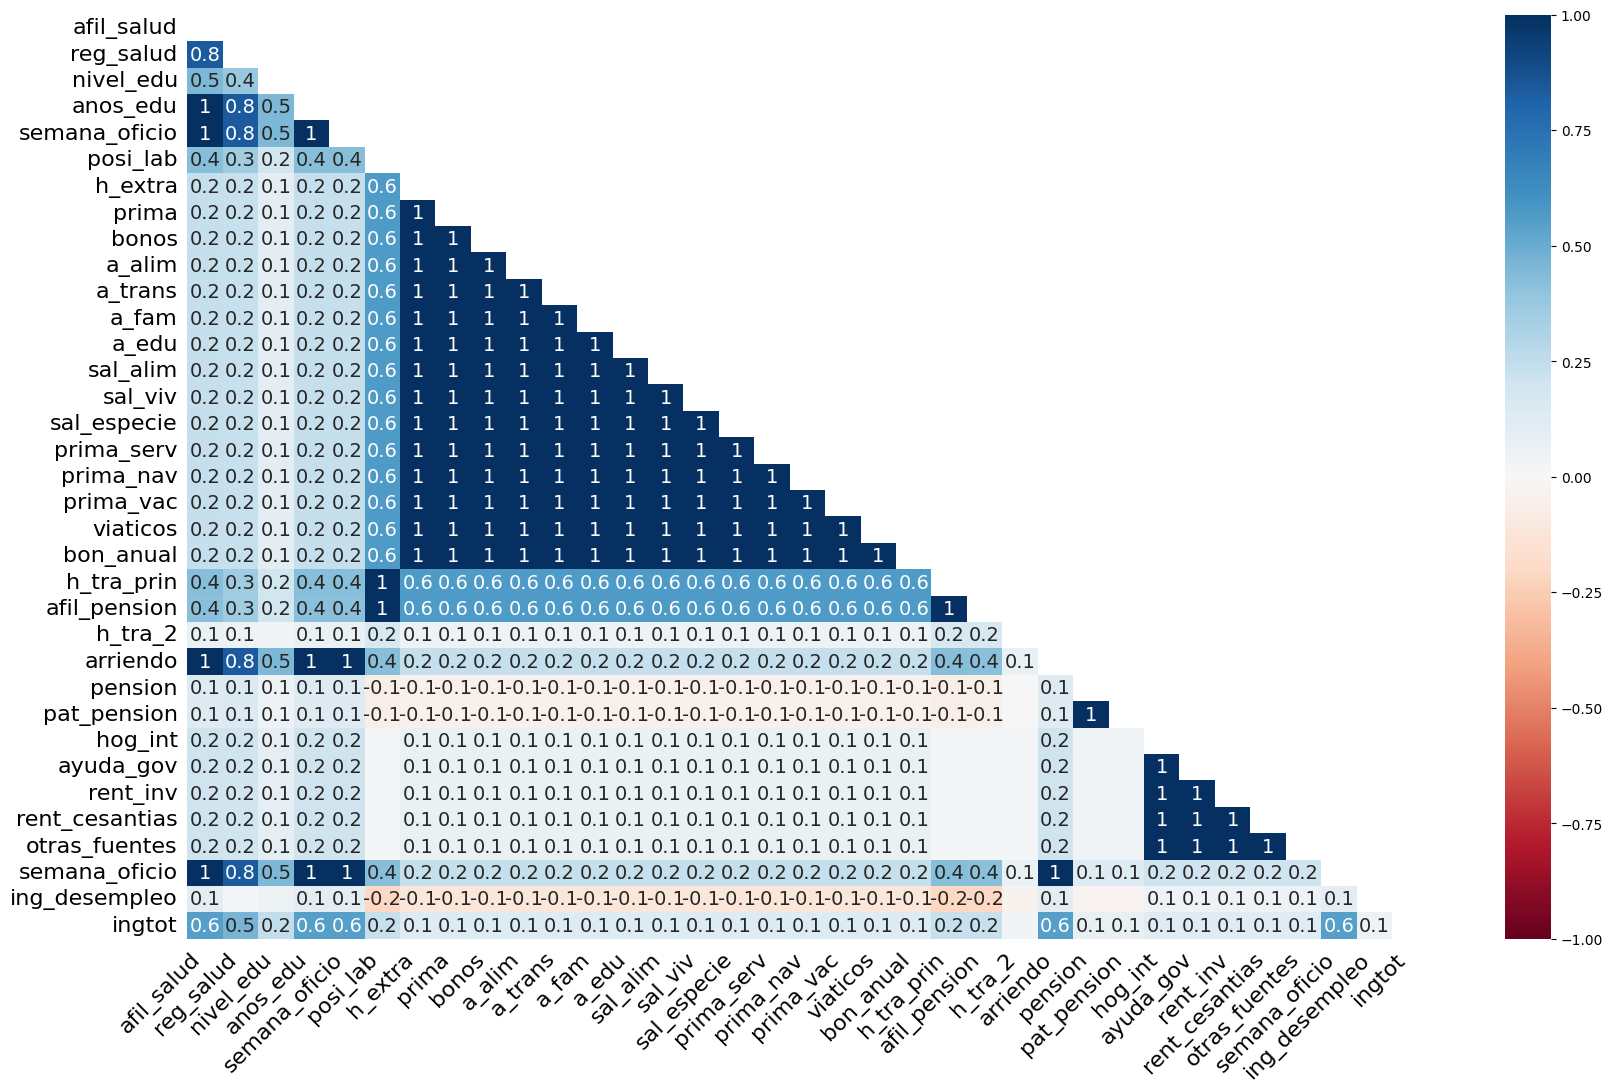

In [20]:
msno.heatmap(data_p)
#Las correlaciones entre valores nulos son las esperadas

<Axes: >

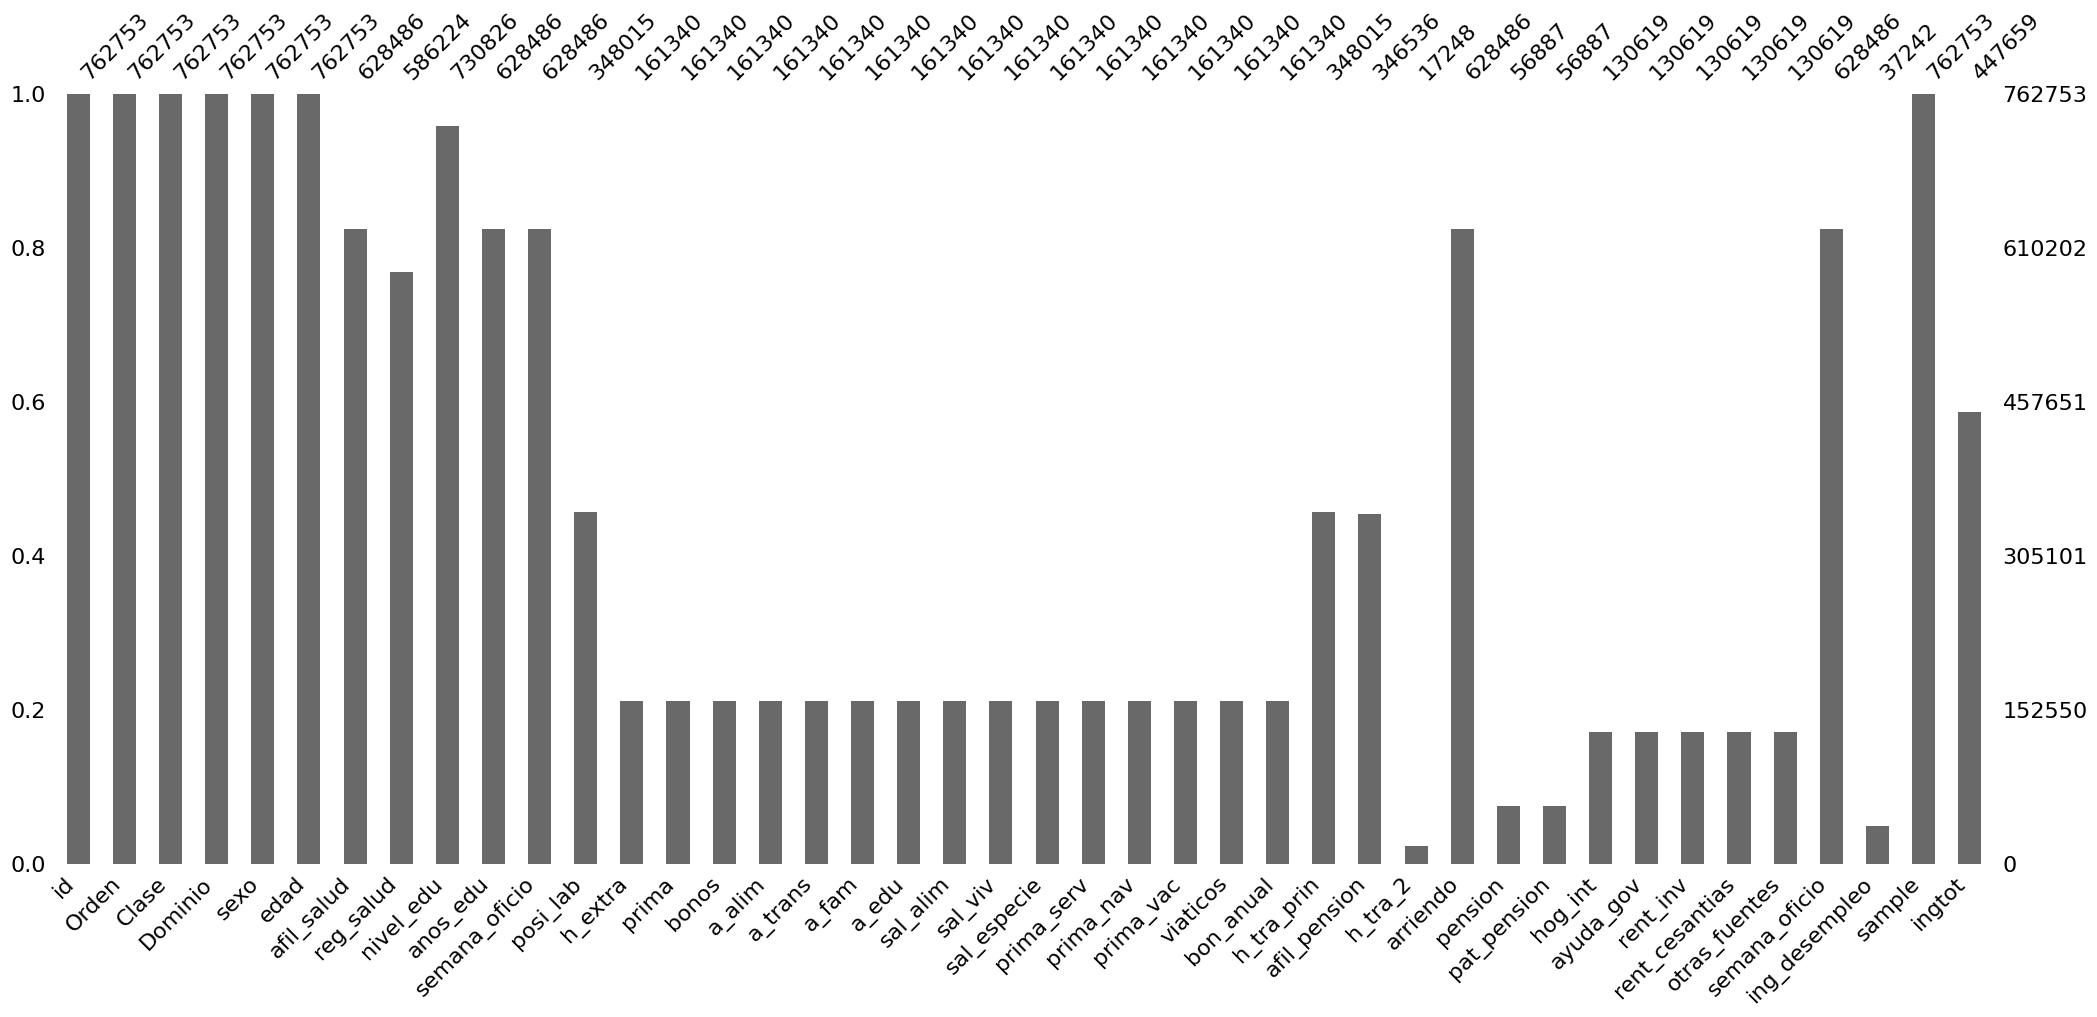

In [22]:
msno.bar(data_p)

Vamos a suponer:
1. los missing en afiliación a salud son personas "no saben no responden"
2. los missing en regimenes de salud son personas "no saben no responden"
3. los missing de arriendo son ingresos por este concepto igual a 0
4. los missing en afiliación pensión son personas no cotisantes

In [26]:
print(data_p['afil_salud'].unique())
print(data_p['reg_salud'].unique())
print(data_p['arriendo'].unique())
print(data_p['afil_pension'].unique())

[ 1. nan  2.  9.]
[ 1. nan  3.  2.  9.]
[ 2. nan  1.]
[ 1. nan  2.  3.]


In [27]:
data_p['afil_salud'] = data_p['afil_salud'].replace([np.nan], 9)
data_p['reg_salud'] = data_p['reg_salud'].replace([np.nan], 9)
data_p['arriendo'] = data_p['arriendo'].replace([np.nan], 2)
data_p['afil_pension'] = data_p['afil_pension'].replace([np.nan], 2)

In [28]:
print(data_p['afil_salud'].unique())
print(data_p['reg_salud'].unique())
print(data_p['arriendo'].unique())
print(data_p['afil_pension'].unique())

[1. 9. 2.]
[1. 9. 3. 2.]
[2. 1.]
[1. 2. 3.]


<Axes: >

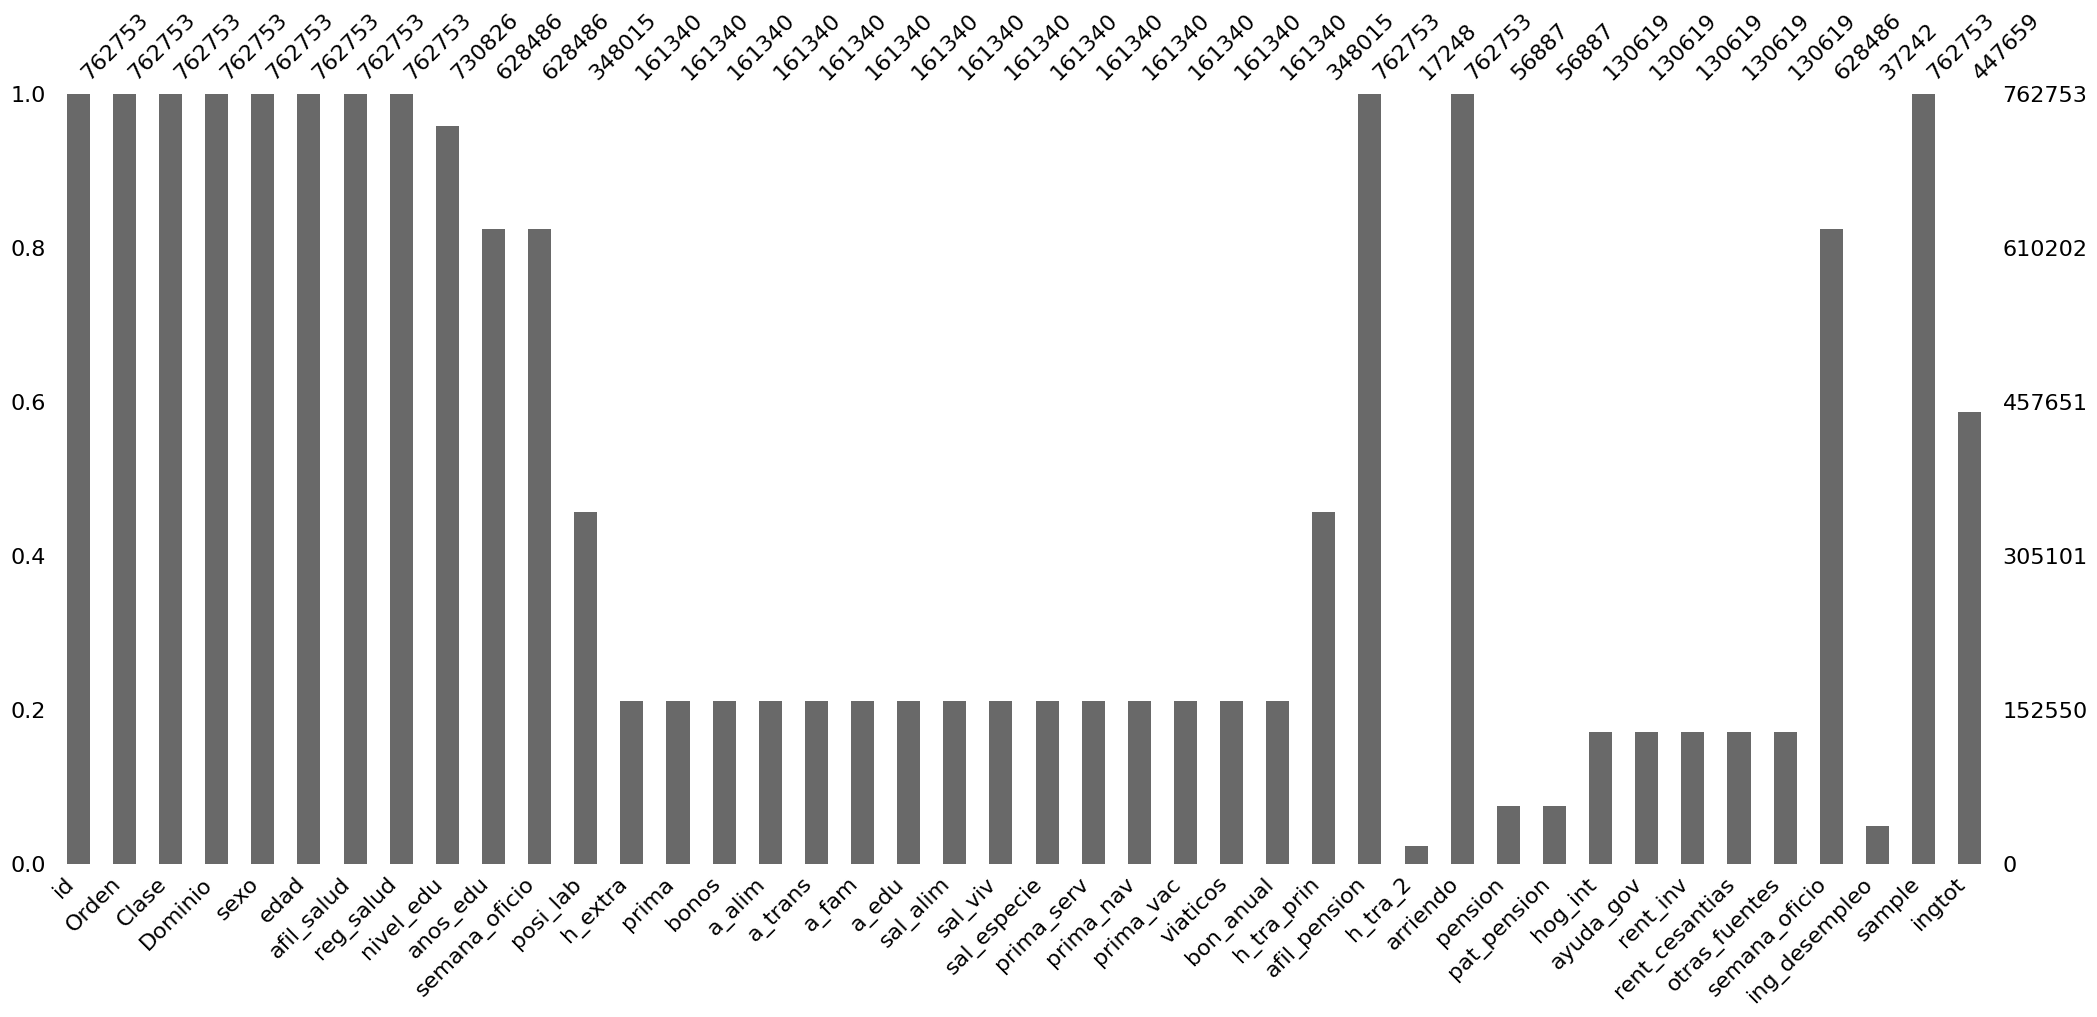

In [29]:
msno.bar(data_p)

count    628486.000000
mean          6.168938
std           3.809229
min           0.000000
25%           3.000000
50%           5.000000
75%          10.000000
max          99.000000
Name: anos_edu, dtype: float64
count    762753.000000
mean         33.538653
std          21.662202
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         110.000000
Name: edad, dtype: float64


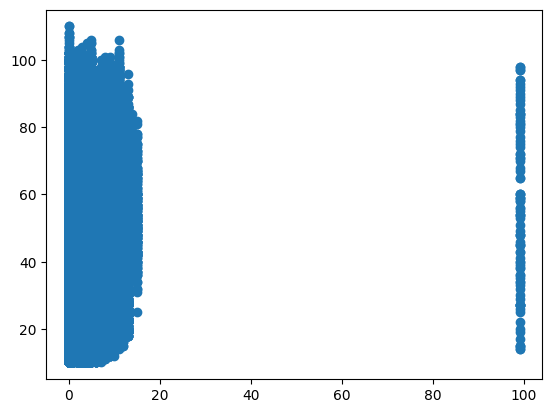

In [35]:
print(data_p['anos_edu'].describe())
print(data_p['edad'].describe())
X = data_p['anos_edu']
Y = data_p['edad']
fig, ax =plt.subplots()
ax.scatter(X, Y)

Se identifican valores atipicos en las variables de edad y años de educación que serán remplazados por la moda de las variables

count    762753.000000
mean          7.008617
std           3.783047
min           0.000000
25%           4.000000
50%           7.000000
75%          11.000000
max          15.000000
Name: anos_edu, dtype: float64
count    762753.000000
mean         33.531222
std          21.652110
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         100.000000
Name: edad, dtype: float64


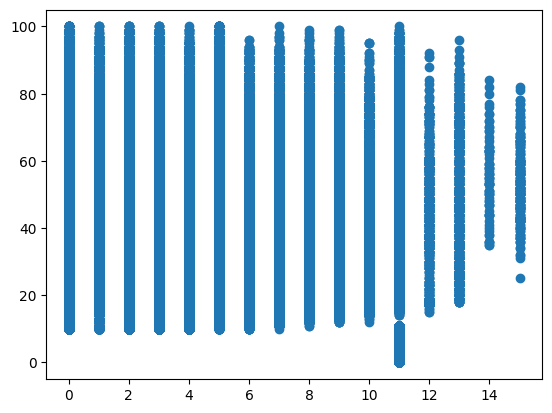

In [36]:
data_p['anos_edu'] = data_p['anos_edu'].where(data_p['anos_edu'] <= 30, data_p['anos_edu'].mode()[0])
data_p['edad'] = data_p['edad'].where(data_p['edad'] <= 100, data_p['edad'].mode()[0])

print(data_p['anos_edu'].describe())
print(data_p['edad'].describe())
X = data_p['anos_edu']
Y = data_p['edad']
fig, ax =plt.subplots()
ax.scatter(X, Y)

La variable nivel_edu y anos_edu tienen difieren entre ellas en terminos de cantidad de missing values. Intentaremos extraer información de anos_edu para reemplazar algunos datos faltantes en la variable nivel_edu

In [38]:
#equivalencias entre nivel_edu y anos_edu
equivalencias = {0: 1, 3: 2, 8: 3, 12: 4, 14: 5, 19: 6, 0: 9}

#mascara booleana para identificar los valores nulos en nivel_edu
mask_missing_nivel_edu = data_p['nivel_edu'].isnull()

valores_faltantes_reemplazados = 0

for index, row in data_p[mask_missing_nivel_edu].iterrows():
    anos_edu_valor = row['anos_edu']
    
    if not pd.isnull(anos_edu_valor):
        #si no encontramos valor reemplazamos con 9 que es "no sabe-noresponde"
        data_p.at[index, 'nivel_edu'] = equivalencias.get(anos_edu_valor, 9)
        valores_faltantes_reemplazados += 1

#cantidad de remplazos
print(f'Número de valores faltantes en nivel_edu reemplazados: {valores_faltantes_reemplazados}')

Número de valores faltantes en nivel_edu reemplazados: 31927


<Axes: >

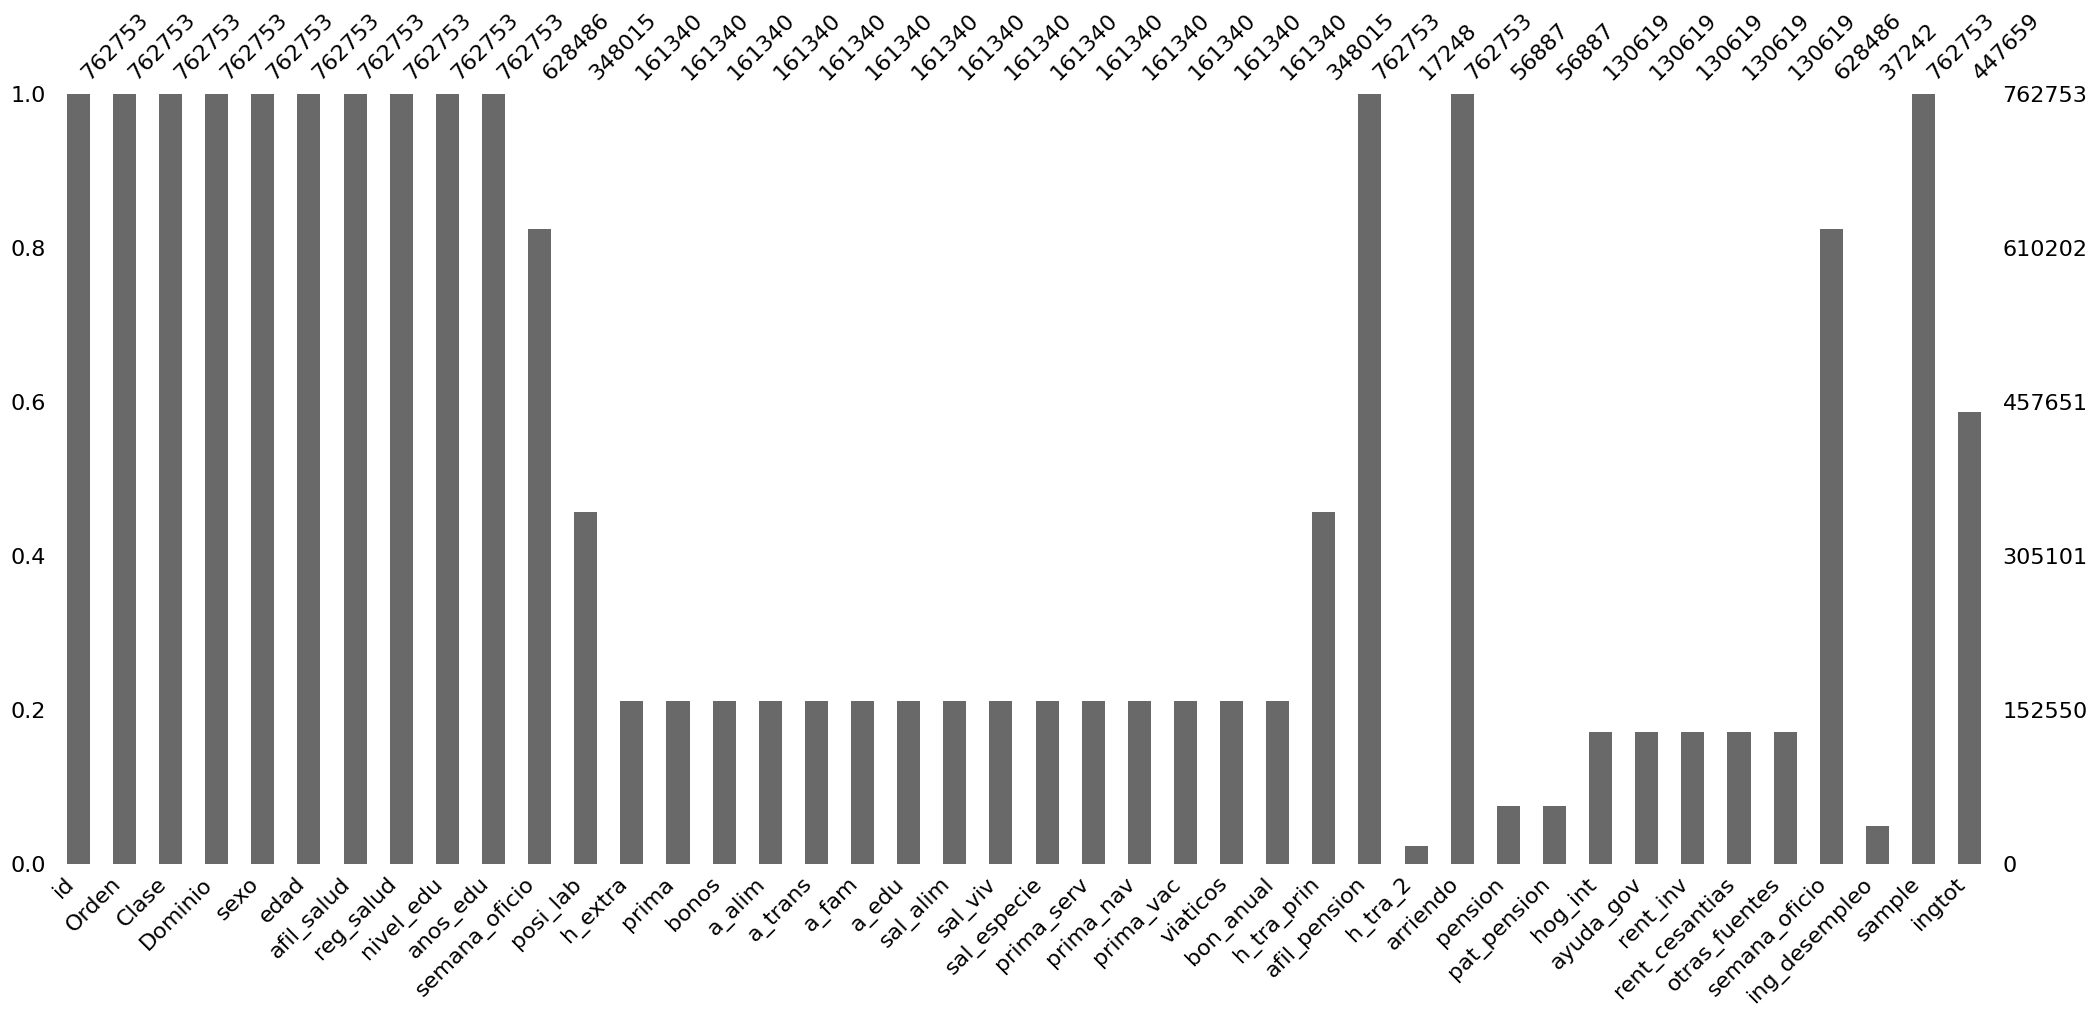

In [39]:
msno.bar(data_p)

Muchas de las variables con valores faltantes pueden ser convertidas en dummy debido a la naturaleza con la que se consturyó la encuesta. Por ejemplo:
1. h_extra: es una varable categoríca que señala si las personas reciben ingresos por horas extra o no y tiene una categoría "no sabe-no responde". Por lo que transformarla en una dummy con 1 para quienes reciben ingresos de horas extra y 0. Esto puede aplicarse para otras variables

In [43]:
data_p = data_p.assign(h_extra = np.where((data_p['h_extra'].isna()) | (data_p['h_extra'] == 9) | (data_p['h_extra'] == 2), 0, data_p['h_extra']),
                       prima = np.where((data_p['prima'].isna()) | (data_p['prima'] == 9) | (data_p['prima'] == 2), 0, data_p['prima']),
                       bonos = np.where((data_p['bonos'].isna()) | (data_p['bonos'] == 9) | (data_p['bonos'] == 2), 0, data_p['bonos']),
                       a_alim = np.where((data_p['a_alim'].isna()) | (data_p['a_alim'] == 9) | (data_p['a_alim'] == 2), 0, data_p['a_alim']),
                       a_trans = np.where((data_p['a_trans'].isna()) | (data_p['a_trans'] == 9) | (data_p['a_trans'] == 2), 0, data_p['a_trans']),
                       a_fam = np.where((data_p['a_fam'].isna()) | (data_p['a_fam'] == 9) | (data_p['a_fam'] == 2), 0, data_p['a_fam']),
                       a_edu = np.where((data_p['a_edu'].isna()) | (data_p['a_edu'] == 9) | (data_p['a_edu'] == 2), 0, data_p['a_edu']),
                       sal_alim = np.where((data_p['sal_alim'].isna()) | (data_p['sal_alim'] == 9) | (data_p['sal_alim'] == 2), 0, data_p['sal_alim']),
                       sal_viv = np.where((data_p['sal_viv'].isna()) | (data_p['sal_viv'] == 9) | (data_p['sal_viv'] == 2), 0, data_p['sal_viv']),
                       sal_especie = np.where((data_p['sal_especie'].isna()) | (data_p['sal_especie'] == 9) | (data_p['sal_especie'] == 2), 0, data_p['sal_especie']),
                       prima_serv = np.where((data_p['prima_serv'].isna()) | (data_p['prima_serv'] == 9) | (data_p['prima_serv'] == 2), 0, data_p['prima_serv']),
                       prima_nav = np.where((data_p['prima_nav'].isna()) | (data_p['prima_nav'] == 9) | (data_p['prima_nav'] == 2), 0, data_p['prima_nav']),
                       prima_vac = np.where((data_p['prima_vac'].isna()) | (data_p['prima_vac'] == 9) | (data_p['prima_vac'] == 2), 0, data_p['prima_vac']),
                       viaticos = np.where((data_p['viaticos'].isna()) | (data_p['viaticos'] == 9) | (data_p['viaticos'] == 2), 0, data_p['viaticos']),
                       bon_anual = np.where((data_p['bon_anual'].isna()) | (data_p['bon_anual'] == 9) | (data_p['bon_anual'] == 2), 0, data_p['bon_anual']),
                       h_tra2 = np.where((data_p['h_tra_2'].isna()) | (data_p['h_tra_2'] == 98) | (data_p['h_tra_2'] == 99), 0, data_p['h_tra_2']))

<Axes: >

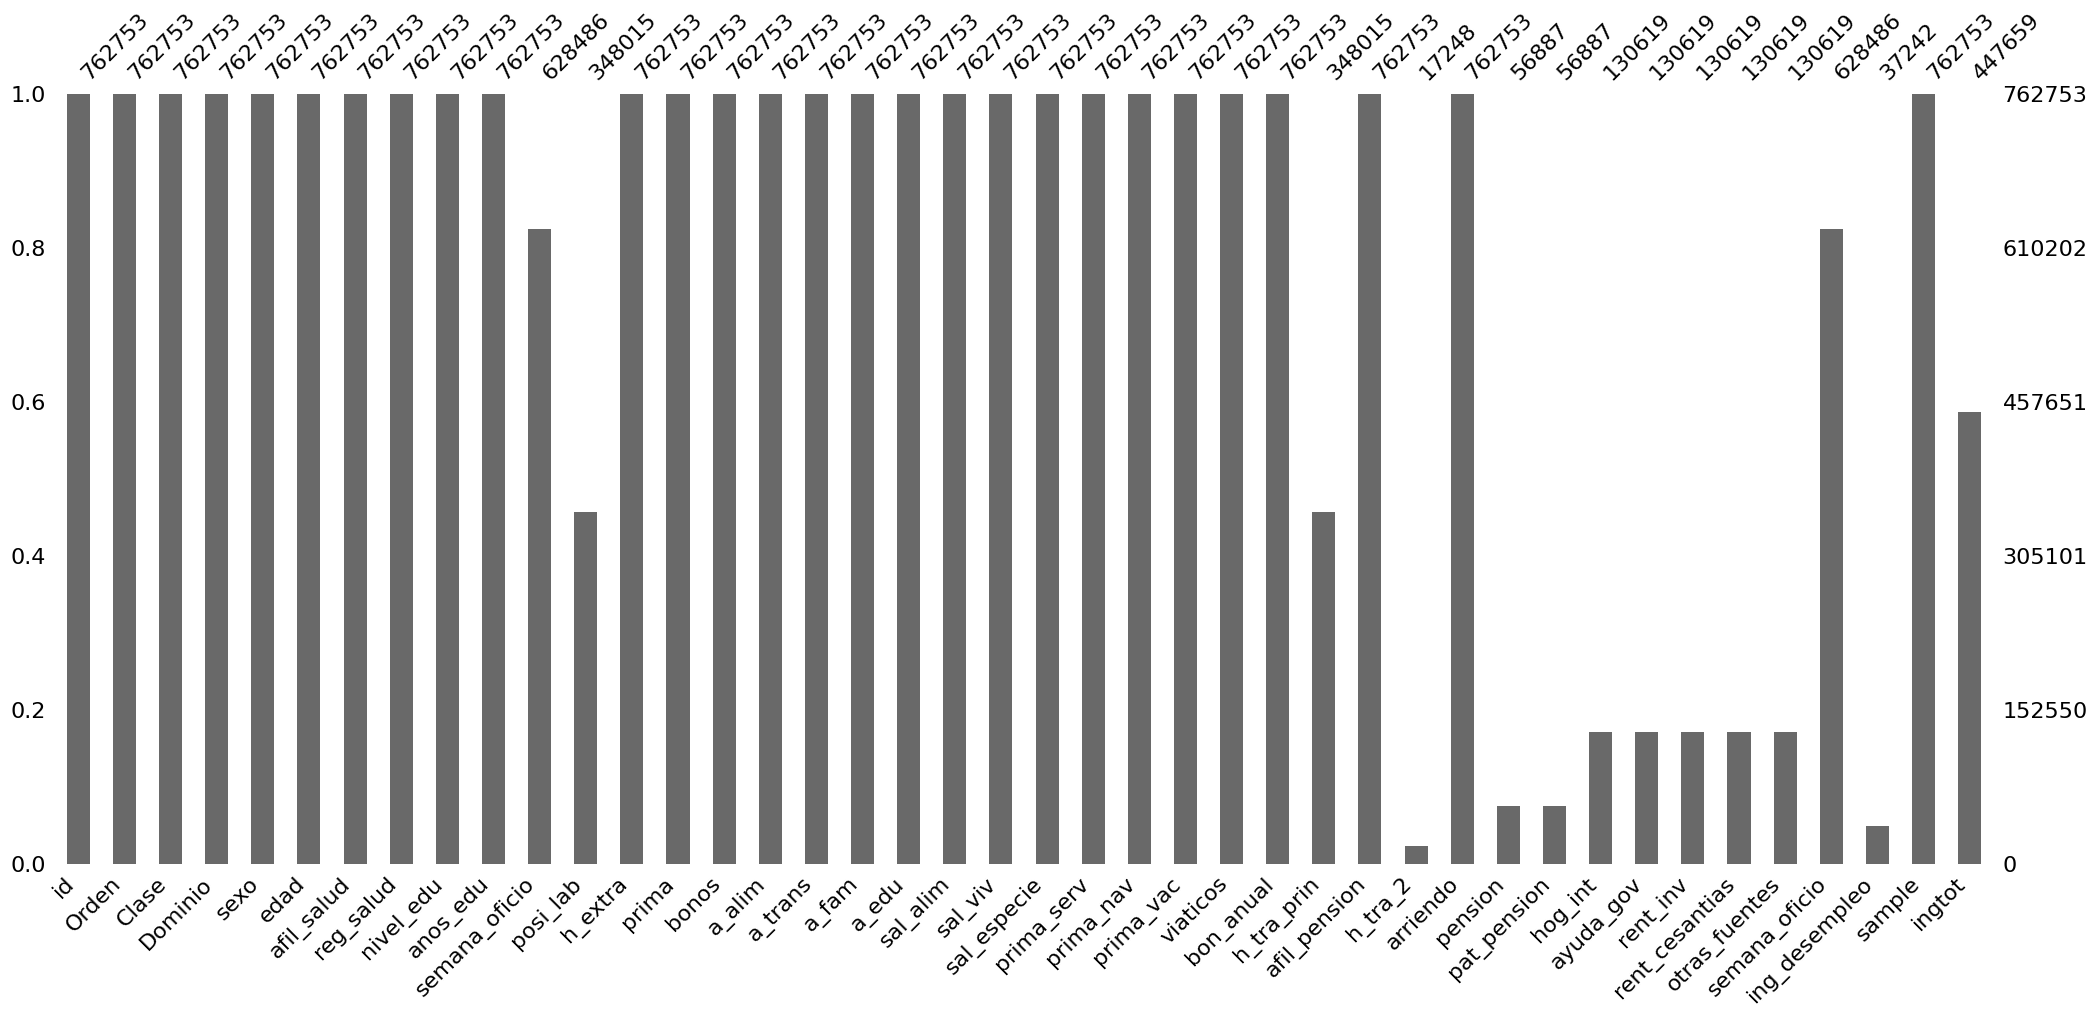

In [44]:
msno.bar(data_p)